# Convolutional Neural Networks

**Time**
- Teaching: 2.5 hours
- Challenges: 30 minutes

**Questions**
- "Understand "


**Learning Objectives**
- ""

* * * * *

## Import packages

For this notebook, instead of importing specific functions, we will import modules that contain functions.

**Old way:**

`from keras.layers import Dense`

`model.add(Dense(...))`

**New way:**

`from keras import layers`

`model.add(layers.Dense(...))`

But why change it up? I had trouble myself in the past understanding the way modules work, so code would break due simply to the way imports were done. Let's avoid that by getting comfortable with python modules!

In [1]:
from keras import layers
from keras import models
from keras.datasets import cifar10

2022-02-22 08:29:03.814208: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-22 08:29:03.814248: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

### CIFAR10

So we get sidetracked at work and instead of creating a model capable of capturing digit information on a check, we want to build a classifier for animals and vehicles!

We shop around and find an interesting image dataset called [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html).

This dataset consists of:
- 60,000 total images
- 10 classes (6,000 images per class)

Example images of each class are shown below:

![CIFAR10 classes](https://maet3608.github.io/nuts-ml/_images/cifar10.png)

### Loading the dataset

In [3]:
def load_cifar10(subset = True):
    """
    Loads a training, validation, and test set of CIFAR10 images.
    
    When subset=TRUE:
    Returns only a subset of the mnist dataset.
    Especially important to use if you are on datahub and only have 1-2GB of memory.
    """
    if subset:
        N_TRAIN = 8000
        N_VALIDATION = 2000
        N_TEST = 2000
    else:
        N_TRAIN = 40000
        N_VALIDATION = 10000
        N_TEST = 10000
    
    (x_train_and_val, y_train_and_val), (x_test, y_test) = cifar10.load_data()
    
    x_train = x_train_and_val[:N_TRAIN,:,:]
    y_train = y_train_and_val[:N_TRAIN]
    
    x_val = x_train_and_val[N_TRAIN: N_TRAIN + N_VALIDATION,:,:]
    y_val = y_train_and_val[N_TRAIN: N_TRAIN + N_VALIDATION]
    
    x_test = x_test[:N_TEST]
    y_test = y_test[:N_TEST]
    
    return x_train, y_train, x_val, y_val, x_test, y_test
    

In [4]:
x_train, y_train, x_val, y_val, x_test, y_test = load_cifar10()

### Input Data Due Dillegence

We will borrow some of our previous functions in order to get a feel for CIFAR10.

In [5]:
def data_summary(data):
    """
    Takes a list of our data partitions and returns the shape.
    """
    
    for i, data_partition in enumerate(data):
        if i == 0:
            print("Training Data")
        elif i == 2:
            print()
            print("Validation Data")
        elif i == 4:
            print()
            print("Testing Data")

        print(f"Shape: {data_partition.shape}")

In [6]:
data_summary([x_train, y_train, x_val, y_val, x_test, y_test])

Training Data
Shape: (8000, 32, 32, 3)
Shape: (8000, 1)

Validation Data
Shape: (2000, 32, 32, 3)
Shape: (2000, 1)

Testing Data
Shape: (2000, 32, 32, 3)
Shape: (2000, 1)


In [7]:
one_image = x_train[0]
one_image.shape

(32, 32, 3)

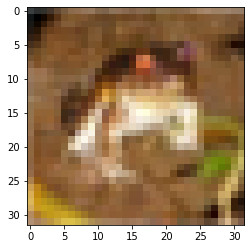

In [8]:
plt.imshow(one_image);

Can you tell what the class of the image above is!?

Let's show more images with their correct class from the CIFAR10.

In [9]:
def plot_images(x, y, random=False):
    """
    Plots 25 images from x data with titles set as y.
    Set random=True if you want
    """
    
    if random:
        indices = np.random.choice(range(y.shape[0]), 25, replace=False)
    
    else:
        indices = np.array(range(25))
    
    fig, axes = plt.subplots(5,5, figsize = (15,15))
    axes = axes.ravel()
    
    for ax, index in zip(axes, indices):
        ax.imshow(x[index])
        ax.set_title(f"Class: {y[index][0]}", size=15)
    
    plt.tight_layout()
    
    return plt.show()

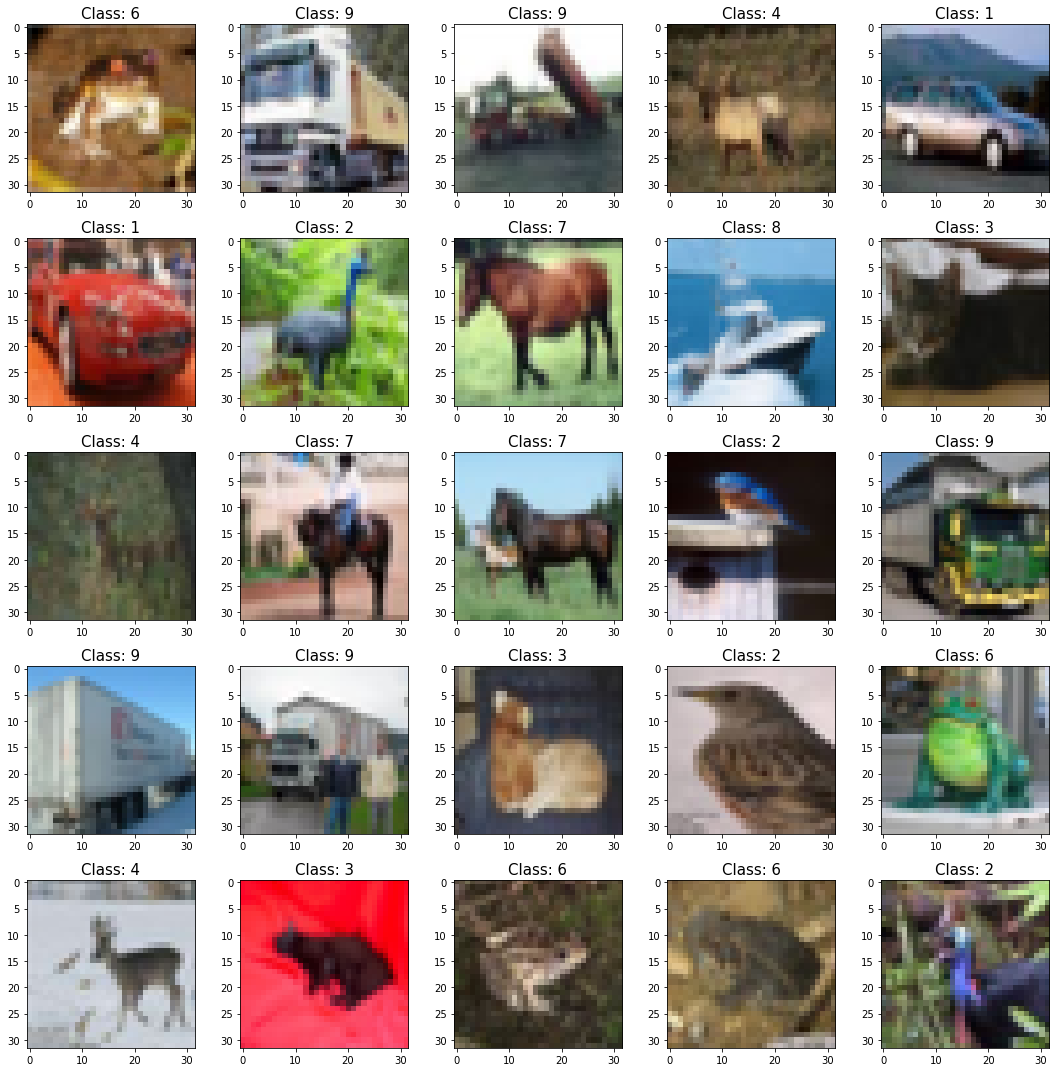

In [10]:
plot_images(x_train, y_train)

Oh no, the class labels are just digits!

## Challenge 1: Translate Classes

Create a function `translate_class()` that uses the correct class name for the target classes (truck, horse, etc..).

In [14]:
def translate_class():
    # Your code here

IndentationError: expected an indented block (808628101.py, line 2)

In [11]:
## TODELETE SOLUTION
def translate_class(y):
    """
    Takes a class index [0-9] and returns the CIFAR10 class category.
    """
    # Create a list of categories
    categories = ["airplane", 
                 "automobile",
                 "bird",
                 "cat",
                 "deer",
                 "dog",
                 "frog",
                 "horse",
                 "ship",
                 "truck"]
    
    return categories[y]
    
    
def translate_classes_fancy(y):
    """
    Use a key-value paired dictionary to translate target class
    """
    # Create a list of categories
    categories = ["airplane", 
                 "automobile",
                 "bird",
                 "cat",
                 "deer",
                 "dog",
                 "frog",
                 "horse",
                 "ship",
                 "truck"]
    
    # Use a dictionary comprehesion to attach class number to category
    category_dict = {key : value for key, value in zip(list(range(10)), categories)}
    
    return category_dict[y]

## Challenge 2: Plotting Image Classes

Create a new function `my_imageplotter()` that uses the correct class name for the target classes (truck, horse, etc..).

- Use the above function `plot_images()` as a starting point!

- Use the [keras CIFAR10 documentation](https://keras.io/api/datasets/cifar10/) as a guide to understand how the labeled classes.

In [ ]:
def my_imageplotter():
    # your code here
    

In [12]:
## TO DELETE TEST SOLUTION

def my_imageplotter(x, y, random=False):
    """
    Plots 25 images from x data with titles set as y.
    Set random=True if you want
    """
    
    if random:
        indices = np.random.choice(range(y.shape[0]), 25, replace=False)
    
    else:
        indices = np.array(range(25))
    
    fig, axes = plt.subplots(5,5, figsize = (15,15))
    axes = axes.ravel()
    
    for ax, index in zip(axes, indices):
        # New line here
        title = translate_class(y[index][0])
        ax.imshow(x[index])
        ax.set_title(f"Class: {title}", size=15)
    
    plt.tight_layout()
    
    return plt.show()

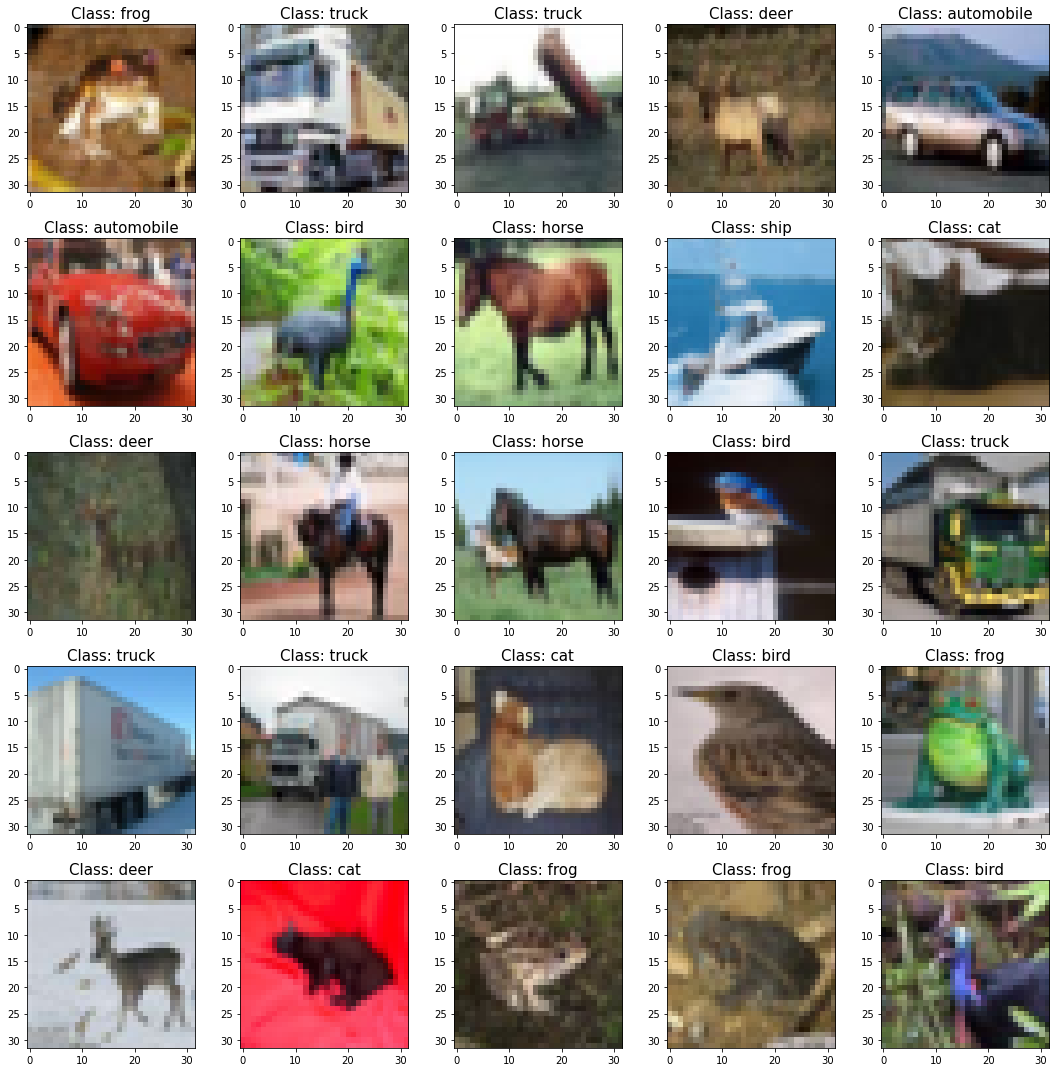

In [13]:
my_imageplotter(x_train, y_train)

Let's make sure we have balanced class distributions.

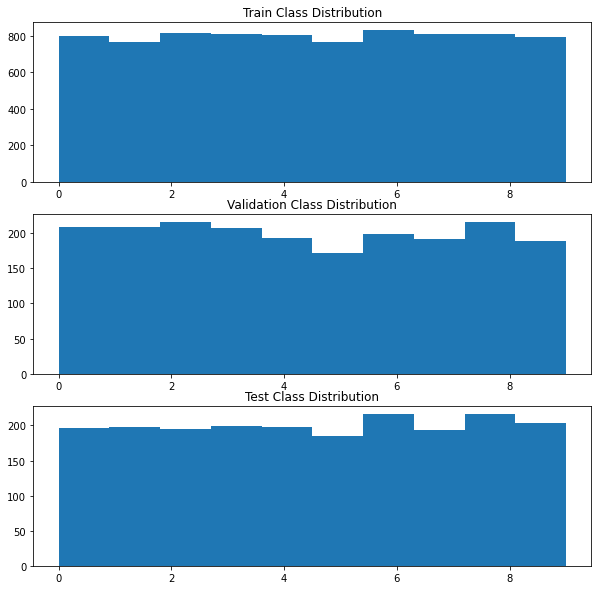

In [14]:
def plot_target_distributions(targets, titles):
    """
    Returns the distribution of target classes.
    """
    
    fig, axes = plt.subplots(3,1, figsize = (10,10))
    
    for ax, target, title in zip(axes, targets, titles):
        ax.hist(target) 
        ax.set_title(f"{title} Class Distribution")
    
    return plt.show()

plot_target_distributions([y_train, y_val, y_test], ["Train", "Validation", "Test"])

Now that we've 

## Hardware for Deep-Learning

In [ ]:
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())